In [2]:
import sys
sys.path.append('../')

In [4]:
import cv2
import numpy as np
from typing import Dict
import matplotlib.pyplot as plt
from src.base.line import Line
from src.data_processing.proc.filters import median_filter
from src.data_processing.analysis import hessian, extract_range

In [6]:
from src.data_processing.io.image import Image

In [8]:
images = [
    Image.from_bin("../data/10may/brain-H_x512.bin", w=512, h=512),
    Image.from_bin("../data/10may/brain-V_x256.bin", w=256, h=256),
    Image.from_bin("../data/10may/spine-H_x256.bin", w=256, h=256),
    Image.from_bin("../data/10may/spine-V_x512.bin", w=512, h=512)
]

In [48]:
def adaptive_equalize(img: Image) -> Image:
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    return Image(clahe.apply(img.img.astype("uint8")))

def my_mean(img: Image, masked=5) -> float:
    arr = []
    for _, value in np.ndenumerate(img.img):
        if value > masked:
            arr.append(value)
    return np.mean(arr)

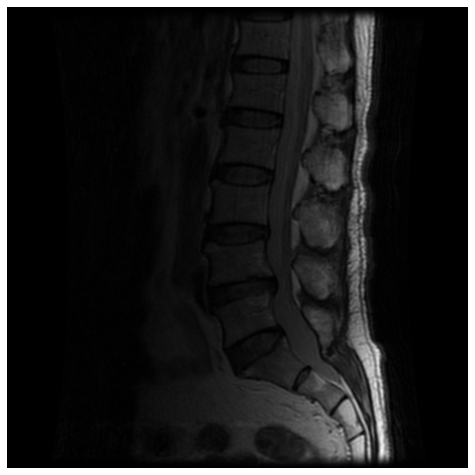

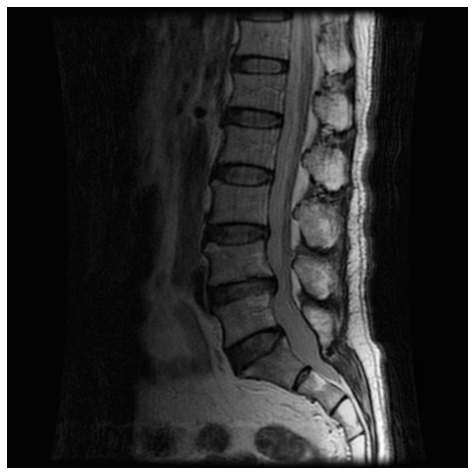

In [110]:
img = images[3]
img.plot()
img = adaptive_equalize(img)
img.plot()

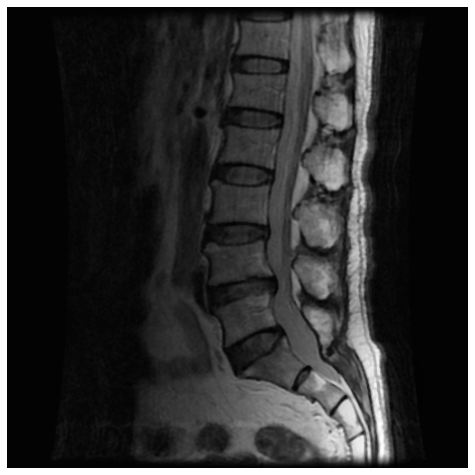

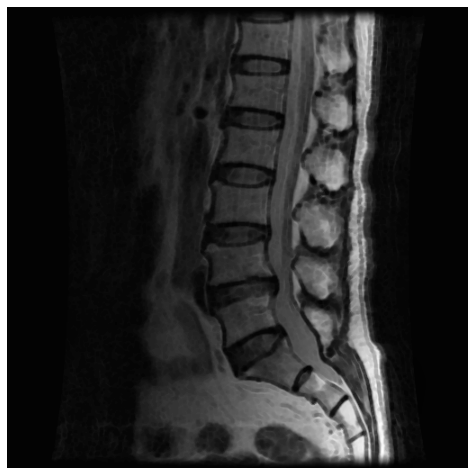

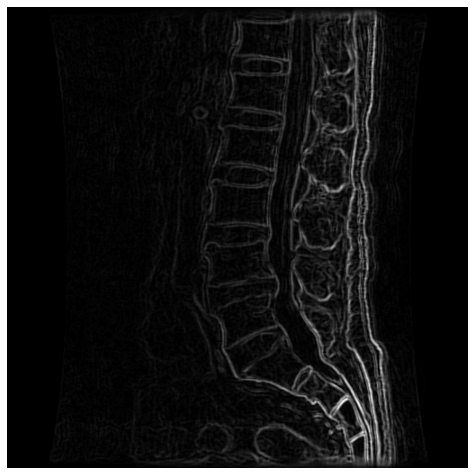

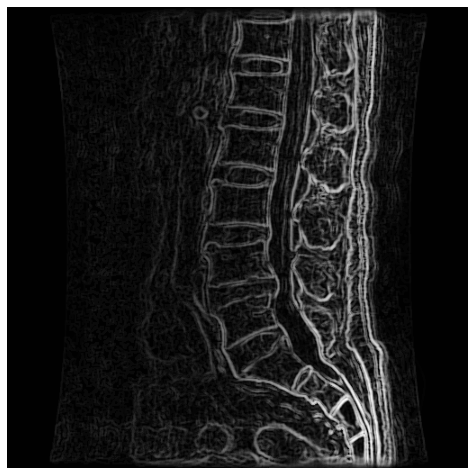

In [111]:
res = median_filter(img, size=3)
res.plot()
res = res.erode(kernel_size=2)
res.plot()
res = (res.dilate(kernel_size=5) - res)
res.plot()
res = adaptive_equalize(res)
res.plot()

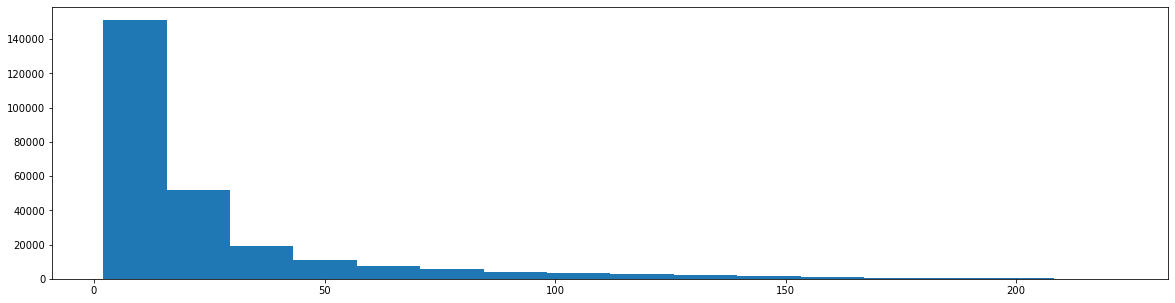

In [112]:
res.histogram(16)

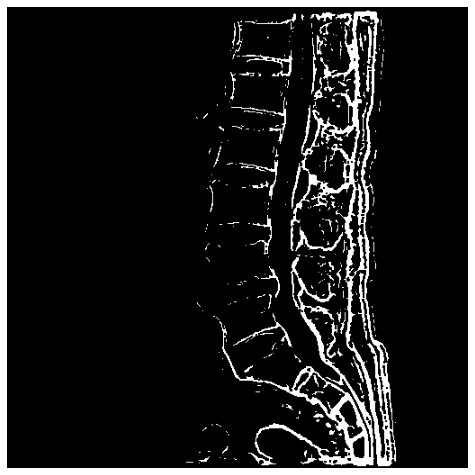

In [113]:
extract_range(res, 60, 255).erode(kernel_size=2).plot()

In [114]:
def color_image(img: Image) -> Image:
    test1 = extract_range(img, 0, 50)
    test2 = extract_range(img, 51, 100)
    test3 = extract_range(img, 100, 150)
    test4 = extract_range(img, 151, 255)

    c1 = [0, 0, 0]
    c2 = [255, 0, 0]
    c3 = [0, 255, 0]
    c4 = [0, 0, 255]

    blank_image = np.zeros((512,512,3), np.uint8)
    for i in range(len(blank_image)):
        for j in range(len(blank_image[i])):
            if test1.img[i][j] == 255:
                blank_image[i][j] = c1
            if test2.img[i][j] == 255:
                blank_image[i][j] = c2
            if test3.img[i][j] == 255:
                blank_image[i][j] = c3
            if test4.img[i][j] == 255:
                blank_image[i][j] = c4

    return Image(blank_image)

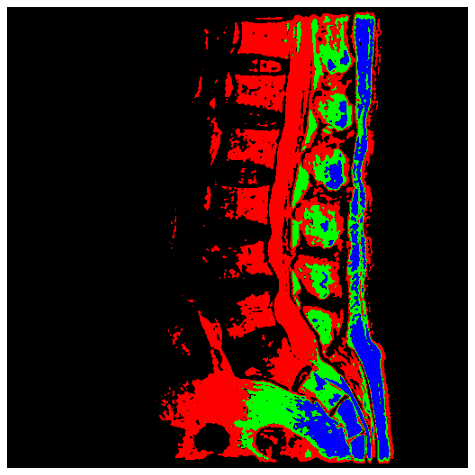

In [115]:
color_image(img).plot()